### The task came from StrataScratch
Link: https://platform.stratascratch.com/data-projects/student-performance-analysis
### The data is in Kaggle
Link: https://platform.stratascratch.com/data-projects/student-performance-analysis
### The description is in UCI
Link: https://archive.ics.uci.edu/dataset/320/student+performance

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Features to analyze:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) <br>
2 sex - student's sex (binary: 'F' - female or 'M' - male) <br>
3 age - student's age (numeric: from 15 to 22) <br>
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) <br>
5 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) <br>
6 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) <br>
7 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) <br>
8 failures - number of past class failures (numeric: n if 1<=n<3, else 4) <br>

These grades are related with the course subject, Math or Portuguese: <br>
9 G1 - first period grade (numeric: from 0 to 20) <br>
10 G2 - second period grade (numeric: from 0 to 20) <br>
11 G3 - final grade (numeric: from 0 to 20, output target) <br>

Data description from UCI: https://archive.ics.uci.edu/dataset/320/student+performance

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df.shape

(395, 33)

In [6]:
data = ["school", "sex", "age", "address", "Medu", "Fedu", "studytime", "activities", "romantic", "failures", "internet", "paid", "G1", "G2", "G3"]

In [7]:
student = df[data]
student.head()

,school,sex,age,address,Medu,Fedu,studytime,activities,romantic,failures,internet,paid,G1,G2,G3
0,GP,F,18,U,4,4,2,no,no,0,no,no,5,6,6
1,GP,F,17,U,1,1,2,no,no,0,yes,no,5,5,6
2,GP,F,15,U,1,1,2,no,no,3,yes,yes,7,8,10
3,GP,F,15,U,4,2,3,yes,yes,0,yes,yes,15,14,15
4,GP,F,16,U,3,3,2,no,no,0,no,yes,6,10,10


In [8]:
# Check for null values
student.isna().sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
studytime     0
activities    0
romantic      0
failures      0
internet      0
paid          0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
# Check for unique values
for col in student.columns:
    print(f"{col}: {student[col].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
studytime: [2 3 1 4]
activities: ['no' 'yes']
romantic: ['no' 'yes']
failures: [0 3 2 1]
internet: ['no' 'yes']
paid: ['no' 'yes']
G1: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


In [10]:
student.loc[:, ["Medu", "Fedu", "studytime"]] = student.loc[:, ["Medu", "Fedu", "studytime"]].astype(str)

/tmp/ipykernel_17/4213476435.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '1' '1' '4' '3' '4' '2' '4' '3' '3' '4' '2' '4' '4' '2' '4' '4' '3'
 '3' '4' '4' '4' '4' '2' '2' '2' '2' '4' '3' '4' '4' '4' '4' '3' '3' '2'
 '4' '4' '3' '2' '2' '4' '4' '2' '2' '4' '3' '4' '4' '4' '2' '4' '4' '4'
 '3' '2' '4' '4' '1' '4' '4' '1' '1' '4' '4' '4' '4' '3' '2' '3' '3' '4'
 '1' '3' '3' '4' '4' '2' '2' '3' '2' '2' '3' '2' '1' '4' '2' '4' '2' '4'
 '3' '4' '3' '4' '2' '1' '4' '2' '4' '4' '4' '4' '4' '3' '3' '3' '2' '3'
 '4' '4' '4' '3' '2' '4' '2' '4' '4' '3' '1' '3' '1' '2' '2' '4' '2' '3'
 '3' '0' '2' '4' '3' '1' '2' '3' '3' '4' '3' '3' '1' '4' '4' '2' '4' '1'
 '2' '1' '3' '1' '4' '2' '1' '2' '3' '3' '4' '2' '1' '1' '2' '3' '2' '3'
 '1' '1' '1' '3' '2' '4' '2' '4' '3' '1' '4' '1' '3' '4' '2' '3' '4' '4'
 '4' '3' '2' '3' '3' '3' '1' '2' '3' '1' '2' '1' '1' '3' '2' '2' '4' '3'
 '4' '4' '4' '2' '1' '2' '2' '3' '3' '4' '1'

In [11]:
student.describe()

,age,failures,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.334177,10.908861,10.713924,10.415190
std,1.276043,0.743651,3.319195,3.761505,4.581443
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,0.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,19.000000,19.000000,20.000000


In [12]:
student.describe(include="object")

,school,sex,address,Medu,Fedu,studytime,activities,romantic,internet,paid
count,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,5,5,4,2,2,2,2
top,GP,F,U,4,2,2,yes,no,yes,no
freq,349,208,307,131,115,198,201,263,329,214


# Data Visualization

In [13]:
student_num = student[["age", "failures", "G1", "G2", "G3"]]

## Histograms
To understand data distribution

Age mean: 16.6962


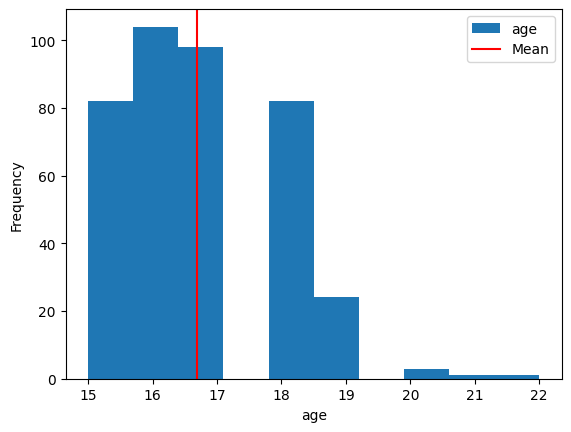

Failures mean: 0.3342


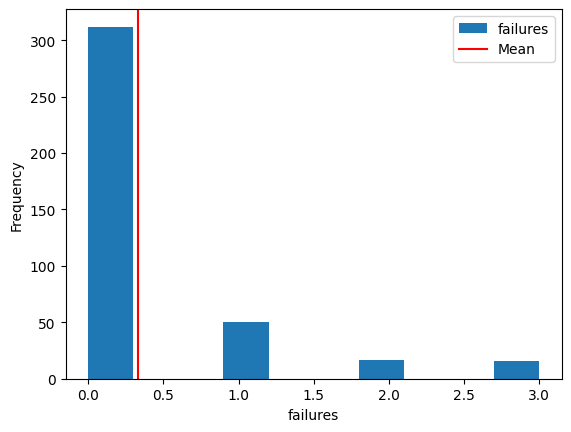

G1 mean: 10.9089


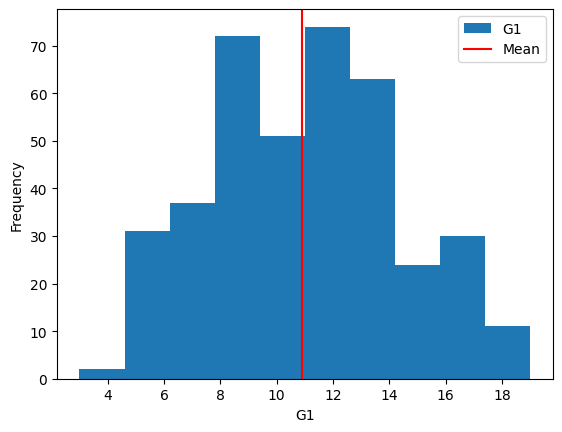

G2 mean: 10.7139


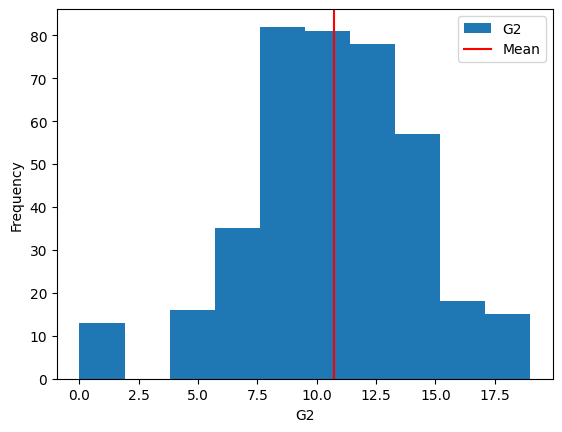

G3 mean: 10.4152


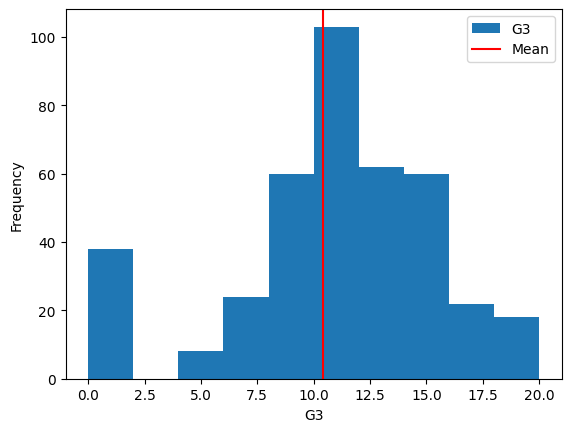

In [14]:
for col in student_num.columns:
    mean = student[col].mean()
    print(f"{col.capitalize()} mean: {round(mean, 4)}")
    student_num[col].plot(kind="hist", xlabel=col)
#     student_num[col].plot(kind="density")
    plt.axvline(mean, color="red", label="Mean")
    plt.legend()
    plt.show()

## Boxplots
For outlier detection and spread of data

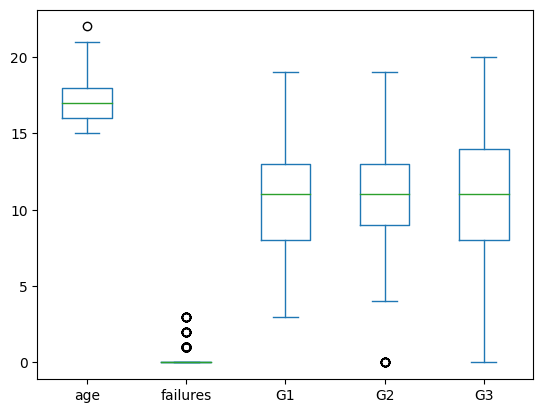

age
22     1
Name: count, dtype: int64

failures
1           50
2           17
3           16
Name: count, dtype: int64

G1: No outliers

G2
0     13
Name: count, dtype: int64

G3: No outliers



In [15]:
box = student_num.plot(kind="box")
plt.show()

for col in student_num.columns:
    q1, q3 = student_num[col].quantile(.25), student_num[col].quantile(.75)
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outlier = pd.DataFrame(student_num.loc[(student_num[col]<lower_bound) | (student_num[col]>upper_bound), col])
    
    if not outlier.empty:
        print(outlier.value_counts())
        print()
    else: 
        print(f"{col}: No outliers\n")
        

## Bar Charts
To compare averages in each categories

In [16]:
cat_cols = ["school", "sex", "address", "Medu", "Fedu", "studytime", "activities", "romantic", "internet", "paid"]
student_cat = student[cat_cols].astype(str)

overall_avg = (student.G1 + student.G2 + student.G3) / 3

student_cat_avg = pd.concat([student_cat, overall_avg.rename("overall_avg")], axis=1)

student_cat_avg.head()

,school,sex,address,Medu,Fedu,studytime,activities,romantic,internet,paid,overall_avg
0,GP,F,U,4,4,2,no,no,no,no,5.666667
1,GP,F,U,1,1,2,no,no,yes,no,5.333333
2,GP,F,U,1,1,2,no,no,yes,yes,8.333333
3,GP,F,U,4,2,3,yes,yes,yes,yes,14.666667
4,GP,F,U,3,3,2,no,no,no,yes,8.666667


In [17]:
# Aggregate 
avg_school = student_cat_avg.groupby("school")["overall_avg"].mean()
avg_sex = student_cat_avg.groupby("sex")["overall_avg"].mean()
avg_address = student_cat_avg.groupby("address")["overall_avg"].mean()
avg_Medu = student_cat_avg.groupby("Medu")["overall_avg"].mean()
avg_Fedu = student_cat_avg.groupby("Fedu")["overall_avg"].mean()
avg_studytime = student_cat_avg.groupby("studytime")["overall_avg"].mean()
avg_activities = student_cat_avg.groupby("activities")["overall_avg"].mean()
avg_romantic = student_cat_avg.groupby("romantic")["overall_avg"].mean()
avg_internet = student_cat_avg.groupby("internet")["overall_avg"].mean()
avg_paid = student_cat_avg.groupby("paid")["overall_avg"].mean()

avg_cats = [avg_school, avg_sex, avg_address, avg_Medu, avg_Fedu, avg_studytime, avg_activities, avg_romantic, avg_internet, avg_paid]

for i in range(len(avg_cats)):
    avg_cats[i].name = cat_cols[i]

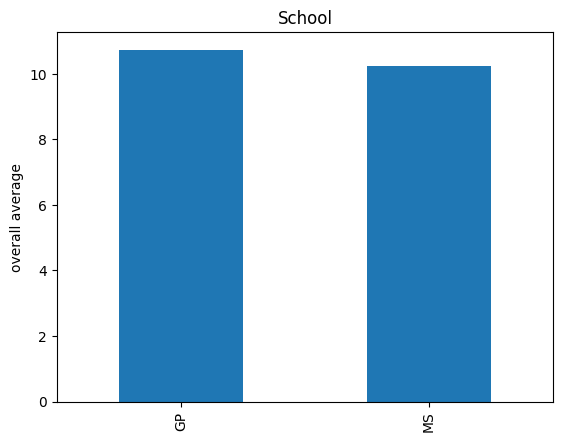

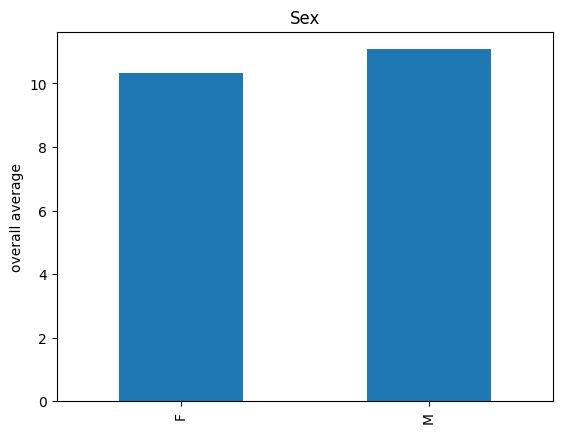

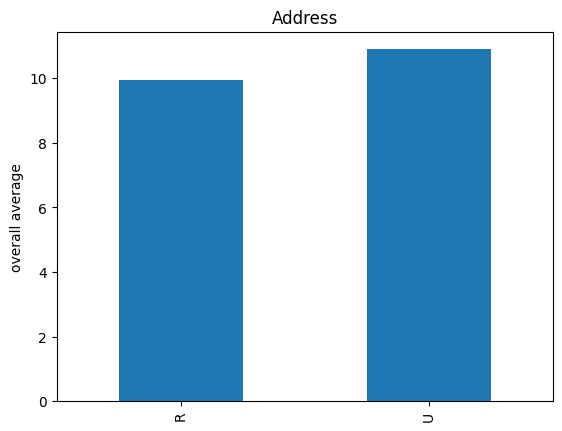

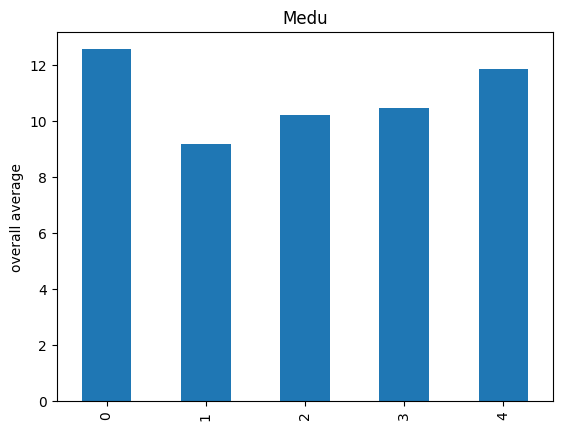

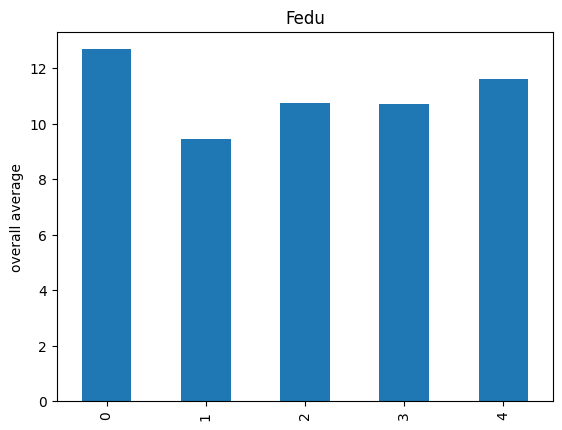

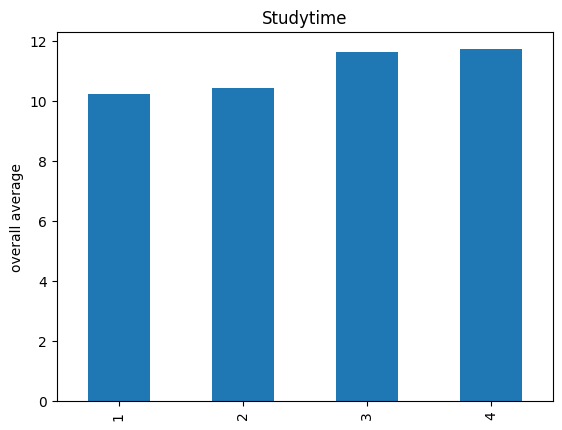

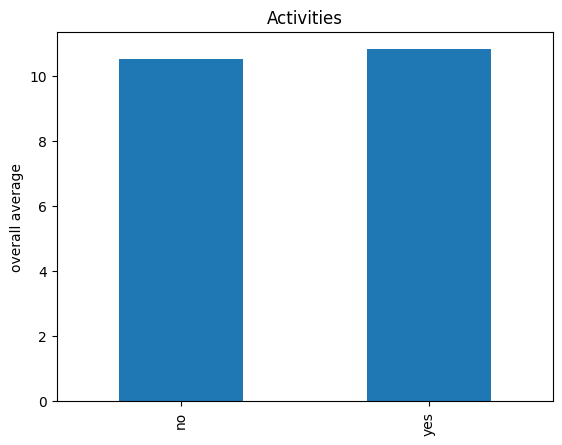

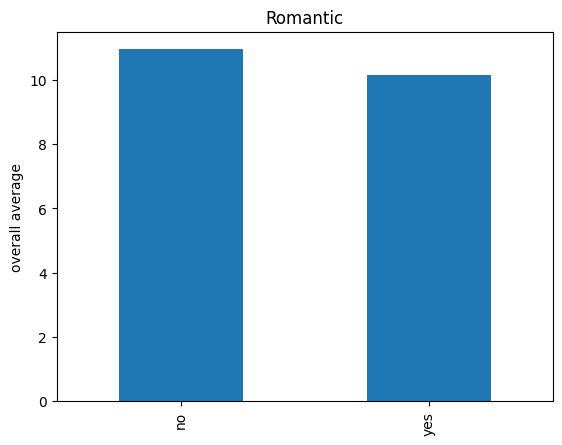

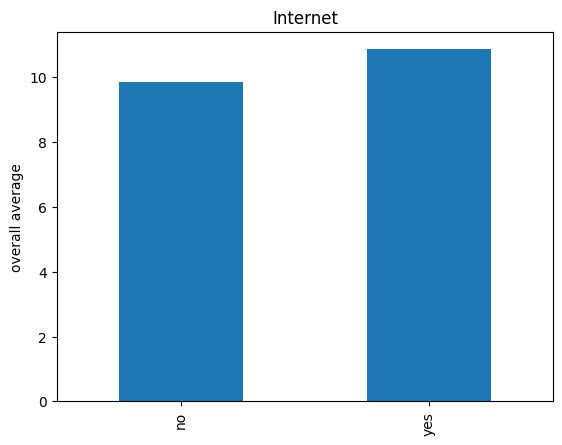

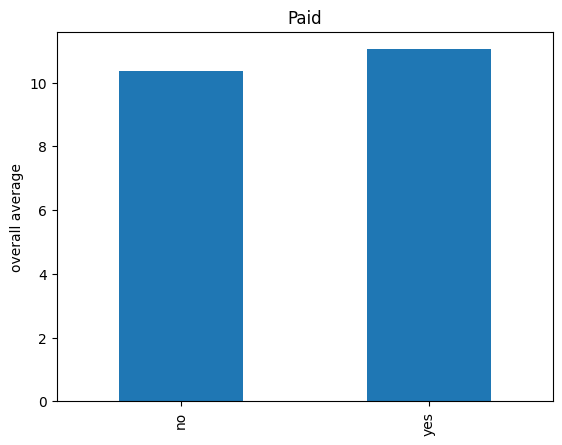

In [18]:
for col in avg_cats:
    col.plot(kind="bar", ylabel="overall average", xlabel="")
    plt.title(col.name.capitalize())
    plt.show()

# Statistical Tests

## Chi-Square Test of Independence

In [19]:
student_cat.columns

Index(['school', 'sex', 'address', 'Medu', 'Fedu', 'studytime', 'activities',
       'romantic', 'internet', 'paid'],
      dtype='object')

In [20]:
from scipy.stats import chi2_contingency

def chi_square(col_1, col_2, display=True):
    """
    Calculates the chi-square stats
    
    parameters:
    col1: DataFrame column
    col2: DataFrame column
    
    returns:
    chi2: chi-square stat
    p: p-value
    dof: degrees of freedom
    expected: expected frequencies
    
    """
    contingency_table = pd.crosstab(col_1, col_2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    contingency_table.reset_index(drop=True, inplace=True)
    if display:
        print(f"Chi2 : {chi2}")
        print(f"p-value : {p}")
        print(f"Degrees of freedom : {dof}")
        
    
    return contingency_table, chi2, p, dof, expected

In [21]:
print("Level of significance: .05\n")

print("Address and StudyTime Chi-square test of Independence")
table1, chi1, p1, dof1, expected1 = chi_square(student_cat.address, student_cat.studytime)

print()

print("Romantic and StudyTime Chi-square test of Independence")
table2, chi2, p2, dof2, expected2 = chi_square(student_cat.romantic, student_cat.studytime)

print()

print("Romantic and Activities Chi-square test of Independence")
table3, chi3, p3, dof3, expected3 = chi_square(student_cat.romantic, student_cat.activities)

print()

print("Paid and Internet Chi-square test of Independence")
table4, chi4, p4, dof4, expected4 = chi_square(student_cat.paid, student_cat.internet)

print()

print("Medu and Paid Chi-square test of Independence")
table5, chi5, p5, dof5, expected5 = chi_square(student_cat.paid, student_cat.Medu)

print()

print("Fedu and Paid Chi-square test of Independence")
table6, chi6, p6, dof6, expected6 = chi_square(student_cat.paid, student_cat.Fedu)


Level of significance: .05

Address and StudyTime Chi-square test of Independence
Chi2 : 5.159194559457368
p-value : 0.16050445310206335
Degrees of freedom : 3

Romantic and StudyTime Chi-square test of Independence
Chi2 : 10.664622810031268
p-value : 0.013684756707976984
Degrees of freedom : 3

Romantic and Activities Chi-square test of Independence
Chi2 : 0.08057773757642686
p-value : 0.776516000281584
Degrees of freedom : 1

Paid and Internet Chi-square test of Independence
Chi2 : 8.456941510245814
p-value : 0.0036365285097773137
Degrees of freedom : 1

Medu and Paid Chi-square test of Independence
Chi2 : 13.827582301676538
p-value : 0.00786616838858245
Degrees of freedom : 4

Fedu and Paid Chi-square test of Independence
Chi2 : 5.686558139421179
p-value : 0.2238110425669106
Degrees of freedom : 4


### Relationship - Studytime association

In [22]:
table2["total"] = table2.iloc[:, :4].sum(axis=1)
table2

studytime,1,2,3,4,total
0,79,126,36,22,263
1,26,72,29,5,132


#### It looks like those in romantic relationship have lesser study time, but let's look at the proportions

In [23]:
study_time = ["<2hours", "2-5hours", "5-10hours", ">10hours"]
# Calculating the proportions
for i in range(1, 5):
    a = str(i)
    table2[study_time[i-1]] = round(table2[a]/table2["total"], 2)
    
table2_prop = table2.iloc[:, 5:].copy()
# print(table2_prop)
table2_prop

studytime,<2hours,2-5hours,5-10hours,>10hours
0,0.3,0.48,0.14,0.08
1,0.2,0.55,0.22,0.04


#### 1) The proportions show that being in a relationship or not doesn't drastically affect student's time allocation for studying 
#### 2) Most students study 2 to 5 hours a week, regardless of their relationship status
#### 3) Few students engage in extensive studying

## Independent T test

In [24]:
from math import sqrt
from typing import Dict
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind


def t_test(col1: pd.Series, col2: pd.Series, cl: float = .95) -> Dict[str, float]:
    
    """
    Perform an independent two-sample t-test on two numerical pandas Series.
    
    This function calculates the t-statistic, p-value, and confidence interval 
    for the difference in means between two groups.

    Parameters:
    - col1 (pd.Series): The first numerical data series.
    - col2 (pd.Series): The second numerical data series.
    - cl (float): The confidence level for the test (default is 0.95).

    Raises:
    - ValueError: If either of the provided columns is not of a numerical type,
      or if the confidence level is not between 0 and 1.
      
    Returns:
    - A dictionary containing the t-statistic, p-value, confidence level, and confidence interval.
    """
        
    if not pd.api.types.is_numeric_dtype(col1) or not pd.api.types.is_numeric_dtype(col2):
        raise ValueError("Both columns must be of a numerical type.")
        
    if not (0<cl<1):
        raise ValueError("Confidence interval must be between 0 and 1")
    
        
    mean_diff = col1.mean() - col2.mean()
    t_stat, p_value = ttest_ind(col1, col2) # Independent samples

    # Standard deviation with df=1
    std1 = col1.std(axis=0, ddof=1)
    std2 = col2.std(axis=0, ddof=1)
    
    # Standard Error
    se = sqrt((std1**2/col1.shape[0])+(std2**2/col2.shape[0]))
    
    # Degrees of Freedom
    df = col1.shape[0] + col2.shape[0] - 2 

    # Find critical value (t) for 95% confidence level
    t_critical = stats.t.ppf(1-(1-cl)/2, df)  # two-tailed test
    
    # Cohen's d
    cd = mean_diff/pd.concat([col1, col2], axis=0).std()
    

    # Margin of Error
    me = t_critical * se

    ci = (mean_diff - me, mean_diff + me)
    
    return {
        "t-statistic": t_stat,
        "p-value": p_value,
        "confidence_level": cl,
        "confidence_interval": ci,
        "mean_diff": mean_diff,
        "effect_size": cd
    }
    
        
    

In [25]:
alpha = .05

### Difference in Mean grades between students living in Urban and Rural areas

#### To find out if the difference in address affects the mean grade of students

In [26]:
student.address.unique()

array(['U', 'R'], dtype=object)

In [27]:
urban_grades = student.loc[student["address"]=="U", ["G1", "G2", "G3"]]
rural_grades = student.loc[student["address"]=="R", ["G1", "G2", "G3"]]


urban_grades["avg"] = urban_grades[["G1", "G2", "G3"]].mean(axis=1)
rural_grades["avg"] = rural_grades[["G1", "G2", "G3"]].mean(axis=1)

In [28]:
t_stat, p_value = ttest_ind(urban_grades["avg"], rural_grades["avg"])
print("Urban Rural mean grade t-test: alpha=.05")
print(f'Mean grade difference: {urban_grades["avg"].mean() - rural_grades["avg"].mean()}')
print(f"T_stat: {t_stat}")
print(f"P value: {p_value}")

Urban Rural mean grade t-test: alpha=.05
Mean grade difference: 0.9520284275984618
T_stat: 2.139440697385603
P value: 0.033015481267113


In [29]:
address_test = t_test(urban_grades["avg"], rural_grades["avg"])
print(address_test)


{'t-statistic': 2.139440697385603, 'p-value': 0.033015481267113, 'confidence_level': 0.95, 'confidence_interval': (0.0715728232862538, 1.8324840319106699), 'mean_diff': 0.9520284275984618, 'effect_size': 0.25752870789305404}


#### The **p-value of 0.03** shows that there is enough evidence that students in urban areas have statistically significant higher grades than those in rural areas. 

#### However, the confidence interval of mean difference is from .07 to 1.8 on a grading scale of 0 to 20, this suggests that the practical impact of this difference is limited, reinforced by **Cohen's d = .25** meaning that the difference is small. 
#### Additionally, while address does influence mean grades, its overall effect appears to be modest.

### Difference in Mean grades between students living in Urban and Rural areas 
* #### To find out if the mean grade of a school is statistically significant higher than the other

In [30]:
student.school.unique()

array(['GP', 'MS'], dtype=object)

In [31]:
ms_grades = student.loc[student["school"]=="MS", ["G1", "G2", "G3"]]
gp_grades = student.loc[student["school"]=="GP", ["G1", "G2", "G3"]]

ms_grades["avg"] = ms_grades[["G1", "G2", "G3"]].mean(axis=1)
gp_grades["avg"] = gp_grades[["G1", "G2", "G3"]].mean(axis=1)

ms_gp_mean_diff = ms_grades["avg"].mean() - gp_grades["avg"].mean()

t_stat, p_value = ttest_ind(ms_grades["avg"], gp_grades["avg"])
print("Ms school vs Gp school mean grade t-test: alpha=.05")
print(f'Grade difference: {ms_gp_mean_diff}')
print(f"T_stat: {t_stat}")
print(f"P value: {p_value}")

Ms school vs Gp school mean grade t-test: alpha=.05
Grade difference: -0.4982143598687756
T_stat: -0.858895732254872
P value: 0.3909216045891275


In [32]:
school_test = t_test(gp_grades["avg"], ms_grades["avg"])
print(school_test)

{'t-statistic': 0.858895732254872, 'p-value': 0.3909216045891275, 'confidence_level': 0.95, 'confidence_interval': (-0.6009347279947796, 1.5973634477323309), 'mean_diff': 0.4982143598687756, 'effect_size': 0.13476961047731018}


#### **Fail to reject the null**: **0.39 p-value** greater than our alpha
#### There's **not enough evidence** to suggest a significant difference in mean grades between (Ms - **Mousinho da Silveira**) and (Gp - **Gabriel Pereira**) schools

### Difference in mean grade of those in romantic relationship and those who aren't

In [33]:
student["romantic"].unique()

array(['no', 'yes'], dtype=object)

In [34]:
romantic = student.loc[student["romantic"]=="yes", ["G1", "G2", "G3"]]
not_romantic = student.loc[student["romantic"]=="no", ["G1", "G2", "G3"]]

romantic["avg"] = romantic[["G1", "G2", "G3"]].mean(axis=1)
not_romantic["avg"] = not_romantic[["G1", "G2", "G3"]].mean(axis=1)

romantic_test = t_test(not_romantic["avg"], romantic["avg"])
print("Mean grade difference of those in romantic relationship and not")
print(romantic_test)

Mean grade difference of those in romantic relationship and not
{'t-statistic': 2.0473968049547433, 'p-value': 0.04128351824358322, 'confidence_level': 0.95, 'confidence_interval': (0.03064386637460259, 1.57754832166549), 'mean_diff': 0.8040960940200463, 'effect_size': 0.2175122318954258}


#### A **p-value of 0.04** shows that there's a statistically significant difference in mean grades between student in a relationship and those who aren't.
#### With a **confidence level = 95%**, the **confidence interval of the mean difference = (0.03 to 1.57)** and a **mean difference = 0.8**.
#### It also has a **Cohen's d = 0.21**
#### Based on this findings, we conclude that although being in a relationship or not has an effect to the students' mean grade, the magnitude of this effect is small.

## ANOVA

### School vs Grades

In [35]:
student.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'studytime',
       'activities', 'romantic', 'failures', 'internet', 'paid', 'G1', 'G2',
       'G3'],
      dtype='object')

In [36]:
from scipy.stats import f_oneway

In [37]:
# Mean
gp_grades_mean = gp_grades.mean(axis=1)
ms_grades_mean = ms_grades.mean(axis=1)
# G1
ms_g1 = ms_grades["G1"]
gp_g1 = gp_grades["G1"]
# G2
ms_g2 = ms_grades["G2"]
gp_g2 = gp_grades["G2"]
# G3
ms_g3 = ms_grades["G3"]
gp_g3 = gp_grades["G3"]

In [38]:
gp_vals = [gp_grades["G1"], gp_grades["G2"], gp_grades["G3"], gp_grades["avg"]]

ms_vals = [ms_grades["G1"], ms_grades["G2"], ms_grades["G3"], ms_grades["avg"]]

for i in range(len(gp_vals)):
    f_stats, f_p_val  = f_oneway(gp_vals[i], ms_vals[i])
    print(gp_vals[i].name)
    print(f"F-stats: {f_stats}")
    print(f"P-value: {f_p_val}")
    print()
    
    

G1
F-stats: 0.26036971483792865
P-value: 0.6101527329410843

G2
F-stats: 0.9883453687293914
P-value: 0.32075882209105233

G3
F-stats: 0.7980416422082741
P-value: 0.3722262371311368

avg
F-stats: 0.7377018788856348
P-value: 0.3909216045891215



#### There is no statistically significant difference in mean grades when comparing the groups.
#### Each group (G1, G2, G3) also shows no significant differences in mean grades based on the individual ANOVAs.

## Correlation Analysis

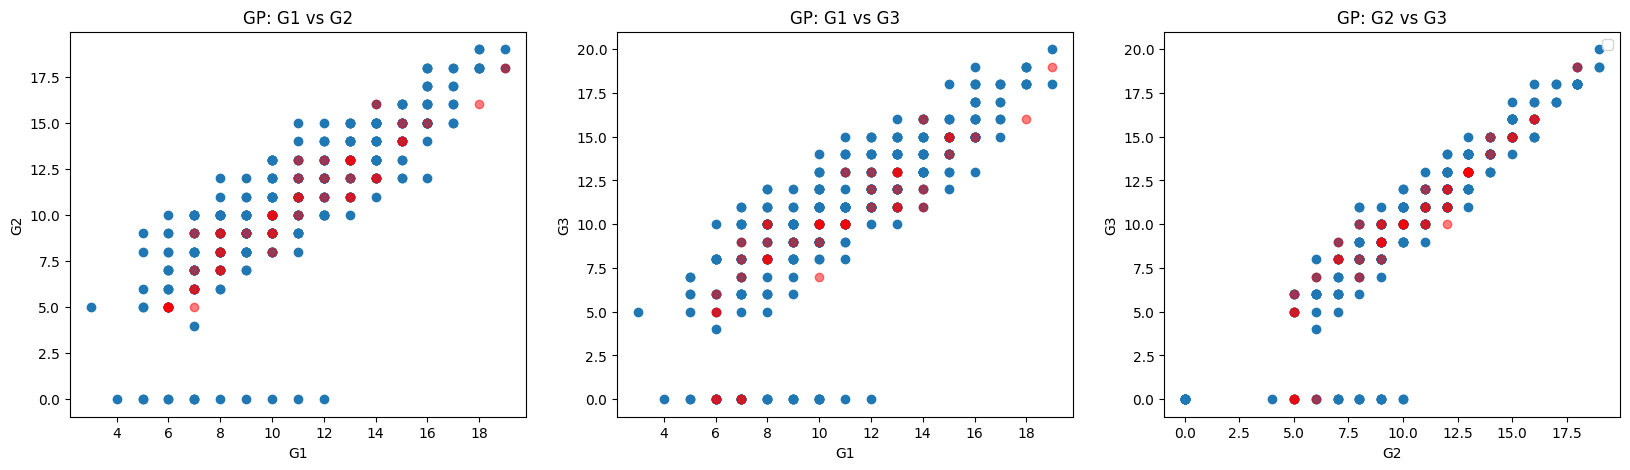

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].scatter(x=gp_g1, y=gp_g2)
ax[0].scatter(x=ms_g1, y=ms_g2, color="red", alpha=.5)
ax[0].set_title(f"GP: {gp_g1.name} vs {gp_g2.name}")
ax[0].set_xlabel(gp_g1.name)
ax[0].set_ylabel(gp_g2.name)

ax[1].scatter(x=gp_g1, y=gp_g3)
ax[1].scatter(x=ms_g1, y=ms_g3, color="red", alpha=.5)
ax[1].set_title(f"GP: {gp_g1.name} vs {gp_g3.name}")
ax[1].set_xlabel(gp_g1.name)
ax[1].set_ylabel(gp_g3.name)


ax[2].scatter(x=gp_g2, y=gp_g3)
ax[2].scatter(x=ms_g2, y=ms_g3, color="red", alpha=.5)
ax[2].set_title(f"GP: {gp_g2.name} vs {gp_g3.name}")
ax[2].set_xlabel(gp_g2.name)
ax[2].set_ylabel(gp_g3.name)


plt.legend()
plt.show()

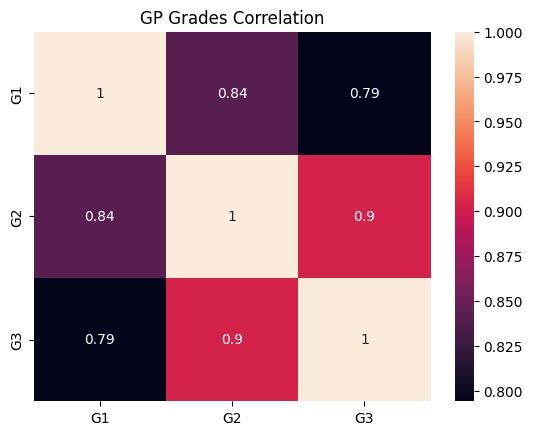

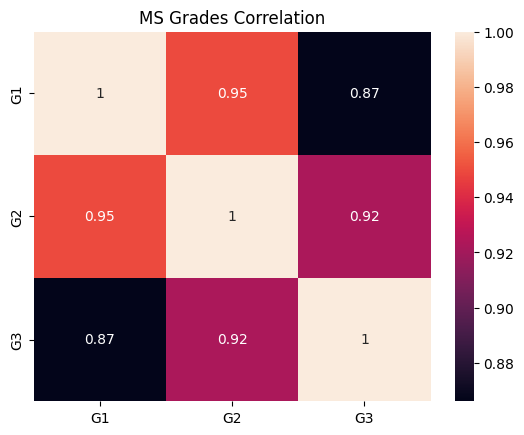

In [40]:
import seaborn as sns

sns.heatmap(gp_grades.iloc[:, :-1].corr(), annot=True)
plt.title("GP Grades Correlation")
plt.show()

sns.heatmap(ms_grades.iloc[:, :-1].corr(), annot=True)
plt.title("MS Grades Correlation")
plt.show()

    

#### This shows that grades have strong positive correlation with each other